Data loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ ?                           │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 598s 594ms/step - accuracy: 0.7832 - loss: 0.1128 - val_accuracy: 0.9941 - val_loss: 0.0479
Epoch 2/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 620s 593ms/step - accuracy: 0.9861 - loss: 0.0455 - val_accuracy: 0.9941 - val_loss: 0.0480
Epoch 3/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 618s 589ms/step - accuracy: 0.9895 - loss: 0.0396 - val_accuracy: 0.9941 - val_loss: 0.0487
Epoch 4/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 618s 586ms/step - accuracy: 0.9836 - loss: 0.0340 - val_accuracy: 0.9940 - val_loss: 0.0528
Epoch 5/5
998/998 ━━━━━━━━━━━━━━━━━━━━ 623s 587ms/step - accuracy: 0.9120 - loss: 0.0291 - val_accuracy: 0.9924 - val_loss: 0.0583
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 164ms/step
Accuracy: 0.9133636221212595
Classification Report:
               precision    recall  f1-score   support

        toxic       0.78      0.77      0.78      3056
 severe_toxic       0.72      0.11      0.19       321
      obscene       0.86      0.77      0.81      1715
       threat       0.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

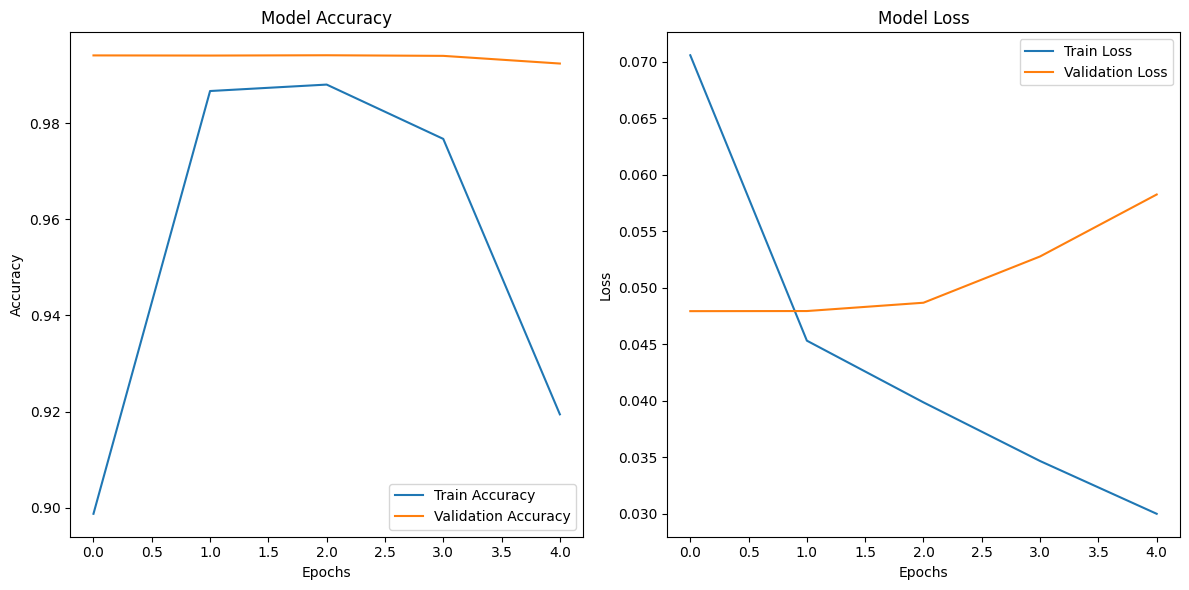

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Load the Dataset (Assuming already unzipped)
data_path = "/content"  # Change this to your actual directory path

# Load CSV files
train_csv_path = os.path.join('/content', "train.csv")
test_csv_path = os.path.join('/content', "test.csv")
test_labels_csv_path = os.path.join('/content', "test_labels.csv")

# Read CSV files with error handling
try:
    train_df = pd.read_csv(train_csv_path)
    test_df = pd.read_csv(test_csv_path)
    test_labels_df = pd.read_csv(test_labels_csv_path)
    print("Data loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}")
    exit()

# Step 2: Preprocess the Data
train_df.fillna(" ", inplace=True)

# Tokenize the text data
MAX_NUM_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['comment_text'].values)
X = tokenizer.texts_to_sequences(train_df['comment_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Check for required label columns
expected_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
if not all(col in train_df.columns for col in expected_columns):
    print("Error: One or more expected columns are missing in the DataFrame.")
    exit()

y = train_df[expected_columns].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Build the Model
def create_model():
    model = Sequential([
        Embedding(MAX_NUM_WORDS, 128, input_length=MAX_SEQUENCE_LENGTH),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=4),
        Bidirectional(LSTM(100, return_sequences=True)),
        GlobalMaxPooling1D(),
        Dense(100, activation='relu'),
        Dropout(0.3),
        Dense(6, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
    return model

model = create_model()
model.summary()

# Step 4: Train and Evaluate the Model
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=(X_test, y_test), verbose=1)

from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test, batch_size=128, verbose=1)
y_pred = (y_pred > 0.5).astype(int)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=expected_columns))

# Step 5: Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
def predict_toxicity(comment):
    comment_seq = tokenizer.texts_to_sequences([comment])
    comment_pad = pad_sequences(comment_seq, maxlen=MAX_SEQUENCE_LENGTH)
    prediction = model.predict(comment_pad)
    if prediction[0][0] > 0.5:
        return "Toxic"
    else:
        return "Non-Toxic"

# Example input from user
example_comment = input("Enter a comment: ")
result = predict_toxicity(example_comment)
print(f"Comment: '{example_comment}' is {result}")



Enter a comment: stupid
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Comment: 'stupid' is Toxic
